# Hong Kong Rainstorm Record Analysis



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Reading dataset

In [2]:
dataset=pd.read_csv('./Dataset/rainstorm.csv')

### Exploratory Data Analysis on our dataset

In [3]:
dataset.shape

(721, 6)

In [5]:
dataset.count()

color         721
start time    721
start date    721
end time      721
end date      721
duration      721
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   color       721 non-null    object
 1   start time  721 non-null    object
 2   start date  721 non-null    object
 3   end time    721 non-null    object
 4   end date    721 non-null    object
 5   duration    721 non-null    object
dtypes: object(6)
memory usage: 33.9+ KB


In [7]:
dataset.describe()

,color,start time,start date,end time,end date,duration
count,721,721,721,721,721,721
unique,3,269,459,244,461,112
top,Amber,11:30,9-Jun-06,11:30,9-Jun-06,01 00
freq,579,8,7,12,7,40


In [8]:
dataset.columns

Index(['color', 'start time', 'start date', 'end time', 'end date',
       'duration'],
      dtype='object')

In [9]:
dataset.nunique(dropna = True)

color           3
start time    269
start date    459
end time      244
end date      461
duration      112
dtype: int64

#Plotting




**Pie Chart that shows Distribution of Warning Signs**



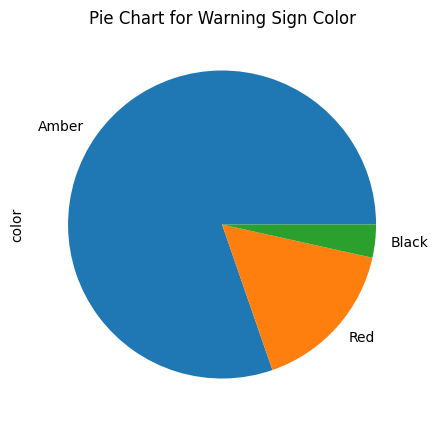

In [10]:
plt.figure(figsize=(5, 5))
top = dataset['color'].value_counts().sort_values(ascending=False).head(10)
top.plot(kind='pie')
plt.title('Pie Chart for Warning Sign Color')
plt.show()     

As Amber signal dominates, we conclude that a rainfall of less than 30mm/hr occurs most of the time.

**Distribution of Rainfall throughout the months**

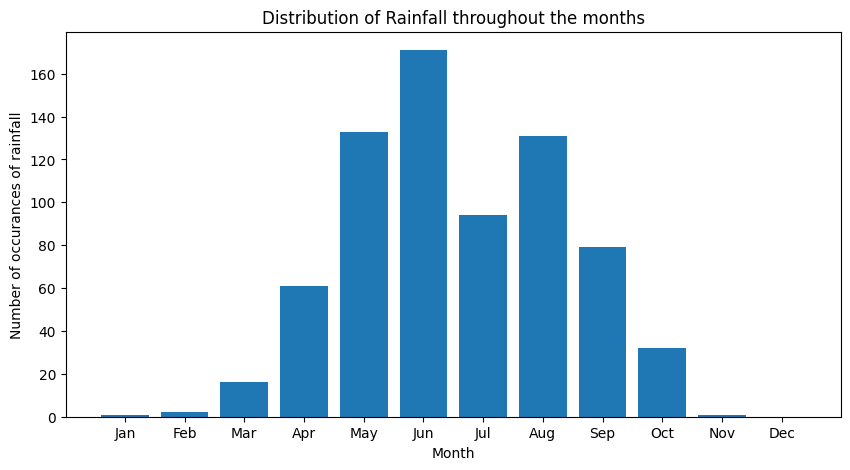

In [11]:
m_count=[]
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for m in months:
 t=0 
 for d in dataset['start date']:
  t+=d.count(m)
 m_count.append(t)

#displaying the plot
fig = plt.figure(figsize = (10, 5))
plt.bar(months,m_count)
plt.xlabel("Month")
plt.ylabel("Number of occurances of rainfall")
plt.title('Distribution of Rainfall throughout the months')
plt.show()

We observe that the maximum rainfall occurs in June. We can classify the period from May-August as Monsoon.

In [64]:
dataset["start date"][1][-3:]

'-98'

In [46]:
import datetime
from datetime import datetime
import time

In [65]:
# converting the start date from panda series to date-time format
#import datetime
#from datetime import datetime
#import time

month_dict={"Jan":"01", "Feb":"02", "Mar":"03", "Apr":"04", "May":"05", "Jun":"06",
            "Jul":"07", "Aug":"08", "Sep":"09", 'Oct':"10",'Nov':"11",'Dec':"12"}

def convertToDate(dt):
    if (int(dt[-2:])>30):
        year="-19"+dt[-2:]
    else:
        year="-20"+dt[-2:] 
    d=dt[:-6]+month_dict[dt[-6:-3]]+year
    date_object = datetime.strptime(d, '%d-%m-%Y').date()
    return(date_object) 

date_time=dataset["start date"]
date=date_time.apply(convertToDate)

**Distribution of duration of rainfall**

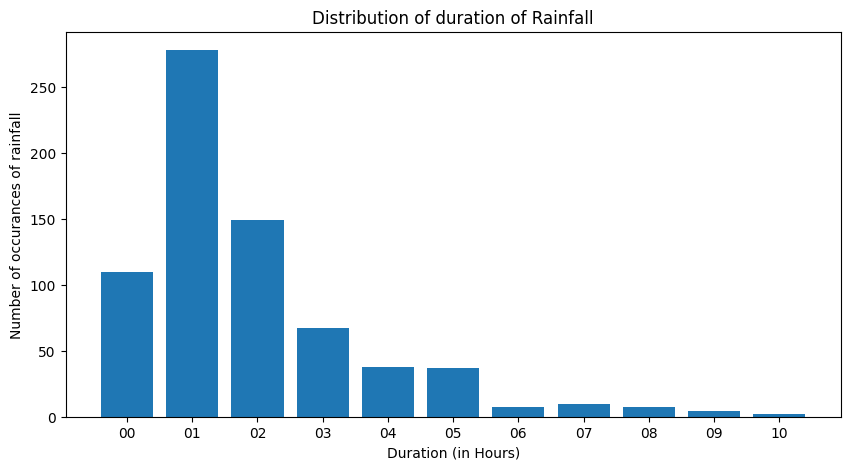

In [12]:
duration_range=['00','01','02','03','04','05','06','07','08','09','10']
dur_range_no=[]
for dur in duration_range:
  t=0
  for d in dataset['duration']:
    if d.startswith(dur):
      t+=1
  dur_range_no.append(t)

#displaying the plot
fig = plt.figure(figsize = (10, 5))
plt.bar(duration_range, dur_range_no)
plt.xlabel("Duration (in Hours)")
plt.ylabel("Number of occurances of rainfall")
plt.title('Distribution of duration of Rainfall')
plt.show()

On an average rainfall lasted 1-2 hours each occurance.

**Total duration of rainfall with the years**

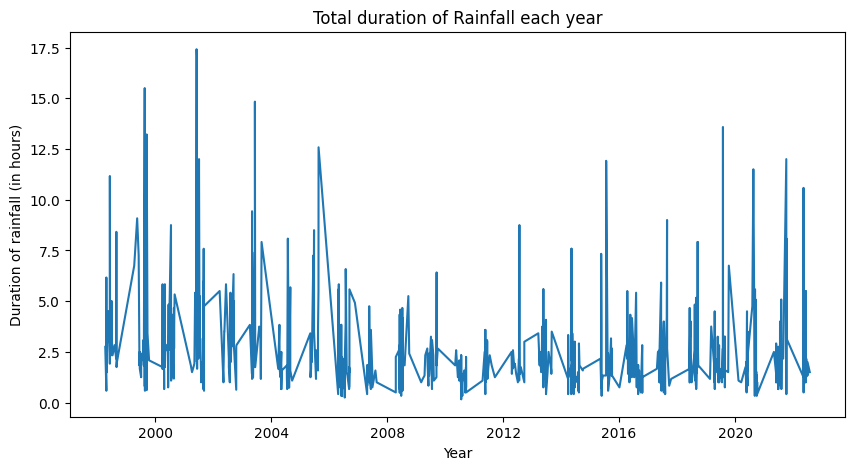

In [95]:
def duration_to_int_format(dur):
    d=dur.split()
    y_duration=int(d[0])+int(d[1])/60.0
    return(y_duration)
duration=(dataset["duration"]).apply(duration_to_int_format)

#displaying the plot
fig = plt.figure(figsize = (10, 5)) 
plt.plot(date,duration)
plt.xlabel("Year")
plt.ylabel("Duration of rainfall (in hours)")
plt.title('Total duration of Rainfall each year')
plt.show()

We can observe a more or less oscilling rainfall duration. The maximum rainfall seems to have decreased from 1998 to 2008 and picking up after.

### Regression Analysis using ARIMA

Steps taken:
1. Visualisation of data
2. Identifying if date is stationary
3. Plot the Correlation and Auto Correlation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data

In [199]:
df={}
df['duration']=duration
df['date']=date
df=pd.DataFrame(df)
df = df.set_index('date')

In [169]:
df=df.drop_duplicates()

In [102]:
pip install statsmodels

     ---------------------------------------- 9.4/9.4 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 KB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Step 2: Identifying if date is stationary

In [170]:
# Using adfuller to check if date is stationary
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['duration'])

# To identify the nature of data, we will be using the null hypothesis.
# H0(non-stationery): The null hypothesis: Statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.
# H1(stationery): The alternative hypothesis: Claim about the population that is contradictory to H0 and what we conclude when we reject H0.

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['duration'])

ADF Test Statistic : -8.60894511208048
p-value : 6.555276426897654e-14
#Lags Used : 0
Number of Observations : 111
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Step 3: Creating correlation and autocorrelation plots

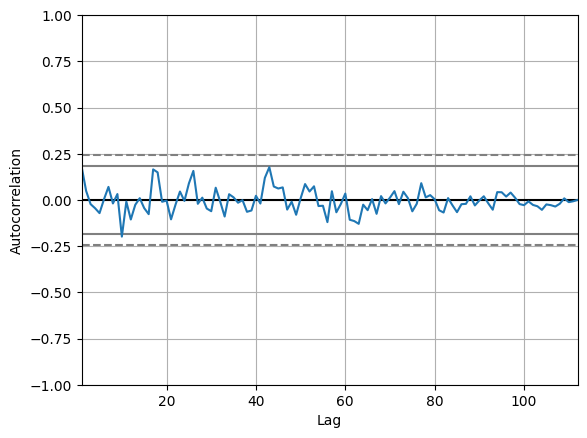

In [171]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['duration'])
plt.show()

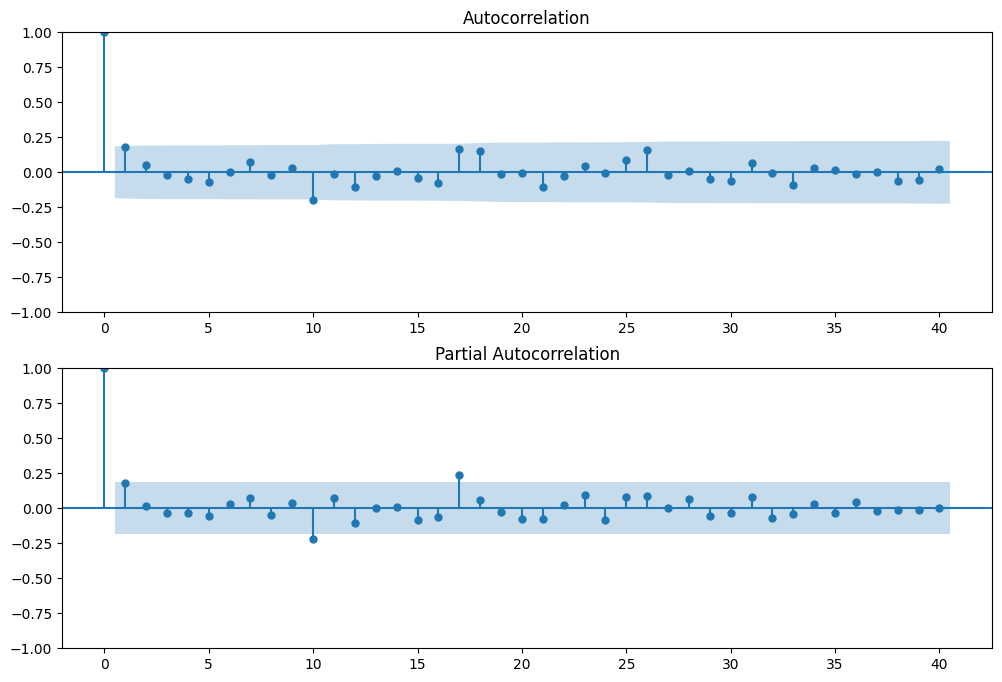

In [172]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['duration'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['duration'].dropna(),lags=40,ax=ax2)

In [173]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['duration'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               duration   No. Observations:                  112
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -309.218
Date:                Fri, 30 Jun 2023   AIC                            624.437
Time:                        17:45:28   BIC                            632.565
Sample:                    04-30-1998   HQIC                           627.734
                         - 05-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1748      0.083      2.104      0.035       0.012       0.338
ma.L1         -0.9722      0.045    -21.766      0.000      -1.060      -0.885
sigma2        15.0376      1.591      9.452      0.000      11.919      18.156
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                21.71
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.97
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Trial 2

In [293]:
df=pd.read_csv('trial.csv',index_col='date', parse_dates=True)

In [294]:
df['duration']=df['duration']*60

In [274]:
df=df.drop_duplicates()

In [277]:
df.shape

(721, 1)

In [185]:
pip install pmdarima

     ------------------------------------- 572.7/572.7 KB 66.0 kB/s eta 0:00:00
     -------------------------------------- 988.4/988.4 KB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [278]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [279]:
stepwise_fit=auto_arima(df['duration'],trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9078.392, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9524.594, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9333.472, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9073.535, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9522.595, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9074.594, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9074.605, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9076.409, Time=1.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9072.321, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9073.444, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9073.452, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9331.472, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9075.438, Time=0.40 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.199 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  721
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4534.160
Date:                Fri, 30 Jun 2023   AIC                           9072.321
Time:                        18:48:15   BIC                           9081.479
Sample:                             0   HQIC                          9075.857
                                - 721                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9726      0.010    -94.255      0.000      -0.993      -0.952
sigma2      1.721e+04    388.957     44.238      0.000    1.64e+04     1.8e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):              3879.22
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             2.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX

In [295]:
import statsmodels.api as sm

In [306]:
model=sm.tsa.statespace.SARIMAX(df['duration'],order=(0, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()

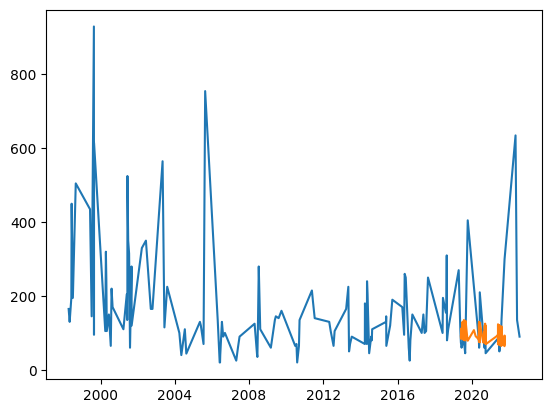

In [310]:
forecast=results.predict(start=600,end=700,dynamic=True)
plt.plot(df['duration'][::5])
plt.plot(forecast)

In [311]:
df['duration'].mean()

151.24826629681

In [314]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(sqrt(mean_squared_error(forecast,df['duration'][599:700])))
print(rmse)

11.58192901552959


In [331]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,duration
2024-02-29,NaN
2024-03-30,NaN
2024-04-30,NaN
2024-05-30,NaN
2024-06-30,NaN


In [344]:
forecast2= results.predict(start = 721, end = 744, dynamic= True) 
forecast2.index=future_dates

<AxesSubplot:xlabel='date'>

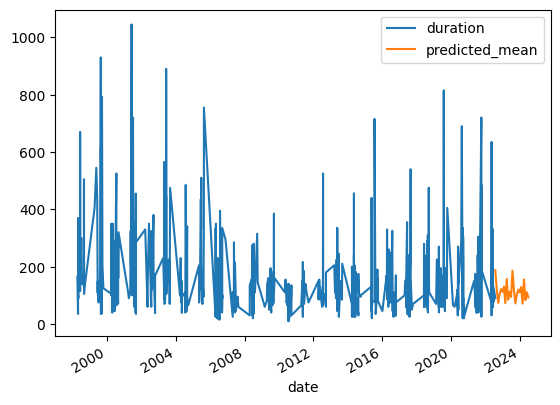

In [347]:
df['duration'].plot(legend=True)
forecast2.plot(legend=True)

# Conclusions



*   As Amber signal dominates, we conclude that a rainfall of less than 30mm/hr occurs most of the time.
*  We observe that the maximum rainfall occurs in June. We can classify the period from May-August as Monsoon.

*   On an average rainfall lasted 1-2 hours each occurance.

*   There is a net positive increase in total duration of rainfall after the year 2012.





